In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

In [3]:
train_it, validation_it, test_it = h.construct_data_generator_w_validation(batch_size=10, rescale=1./255.)

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


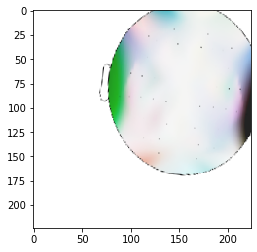

In [9]:
plt.imshow(train_it.next()[0][2])

data/test/04778.png


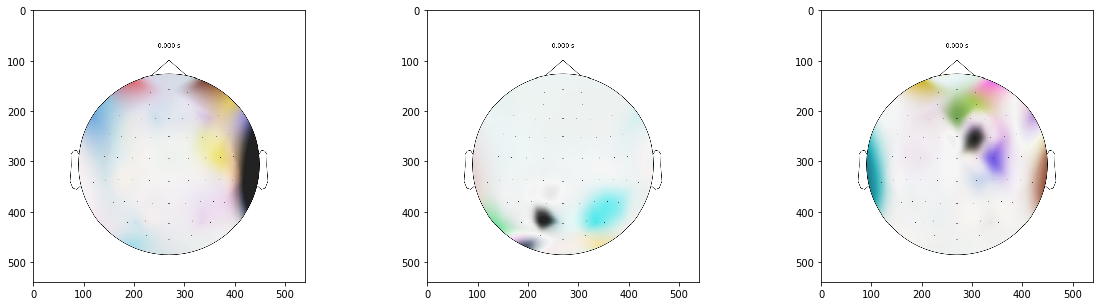

In [5]:
h.plot_examples('test')

In [11]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(32, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(128, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(256, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [12]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [13]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)
ch = ModelCheckpoint('models/custom/cnn_topomap_classification_model_8.h5', monitor='val_accuracy', 
                     mode='max', save_best_only=True)

es = EarlyStopping(mode='min', min_delta=0.0001, patience=15, verbose=1)

In [14]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_8')

Model: "cnn_topomap_classification_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (No

In [15]:
r = model.fit_generator(train_it, epochs=100, callbacks=[tb_log, ch, es], validation_data=validation_it)

Epoch 1/100
2205/2205 [==============================] - 398s 181ms/step - loss: 1.0993 - accuracy: 0.3349 - val_loss: 1.0977 - val_accuracy: 0.3438
Epoch 2/100
2205/2205 [==============================] - 398s 180ms/step - loss: 1.0985 - accuracy: 0.3340 - val_loss: 1.0977 - val_accuracy: 0.3454
Epoch 3/100
2205/2205 [==============================] - 398s 180ms/step - loss: 1.0978 - accuracy: 0.3453 - val_loss: 1.0959 - val_accuracy: 0.3600
Epoch 4/100
2205/2205 [==============================] - 400s 181ms/step - loss: 1.0961 - accuracy: 0.3588 - val_loss: 1.0928 - val_accuracy: 0.3698
Epoch 5/100
2205/2205 [==============================] - 399s 181ms/step - loss: 1.0942 - accuracy: 0.3634 - val_loss: 1.0912 - val_accuracy: 0.3727
Epoch 6/100
2205/2205 [==============================] - 401s 182ms/step - loss: 1.0935 - accuracy: 0.3647 - val_loss: 1.0982 - val_accuracy: 0.3708
Epoch 7/100
2205/2205 [==============================] - 399s 181ms/step - loss: 1.0920 - accuracy: 0.3716

Epoch 56/100
2205/2205 [==============================] - 400s 181ms/step - loss: 0.7337 - accuracy: 0.6652 - val_loss: 0.7125 - val_accuracy: 0.6756
Epoch 57/100
2205/2205 [==============================] - 396s 179ms/step - loss: 0.7253 - accuracy: 0.6710 - val_loss: 0.7233 - val_accuracy: 0.6679
Epoch 58/100
2205/2205 [==============================] - 400s 181ms/step - loss: 0.7238 - accuracy: 0.6723 - val_loss: 0.7000 - val_accuracy: 0.6952
Epoch 59/100
2205/2205 [==============================] - 396s 179ms/step - loss: 0.7205 - accuracy: 0.6749 - val_loss: 0.7160 - val_accuracy: 0.6844
Epoch 60/100
2205/2205 [==============================] - 394s 179ms/step - loss: 0.7155 - accuracy: 0.6802 - val_loss: 0.7072 - val_accuracy: 0.6803
Epoch 61/100
2205/2205 [==============================] - 396s 180ms/step - loss: 0.7021 - accuracy: 0.6823 - val_loss: 0.6828 - val_accuracy: 0.6968
Epoch 62/100
2205/2205 [==============================] - 395s 179ms/step - loss: 0.6953 - accuracy:

In [ ]:
evaluate = model.evaluate_generator(test_it)

In [ ]:
y_prob = model.predict_generator(test_it)

In [ ]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_8')

In [ ]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_8')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_8.png')

In [ ]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_8')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_8.png')